# Alunos

* Arthur Ricardo - Matrícula: 2023002103

* Ítalo Nicácio - Matrícula: 2023002117

# Lista 1

# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras import callbacks
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

#1.

In [ ]:
def f(x)->float:
  return np.exp(-x)

In [ ]:
def f1(x)->float:
  return np.log10(x)

In [ ]:
def f2(x)->float:
  return 10*np.power(x,5)+5*np.power(x,4)+2*np.power(x,3)-0.5*np.power(x,2)+3*x +2

# 1. a) $$f(x)= e^{-x}$$


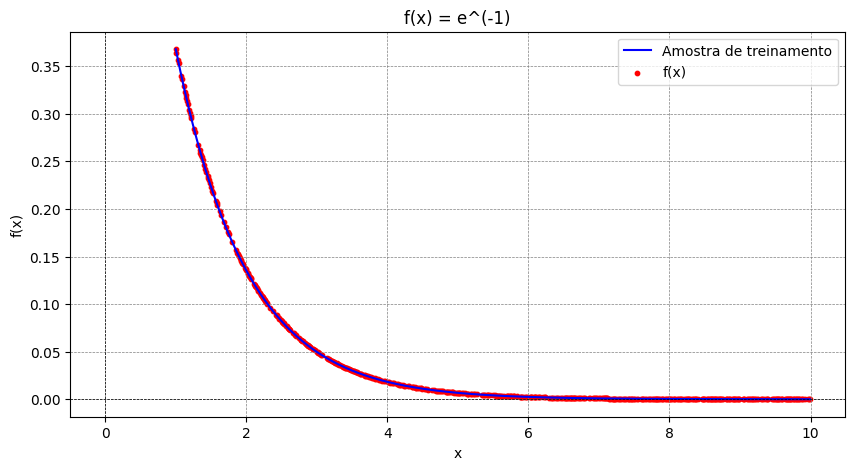

In [ ]:
inicio = 1
fim = 10
step = 0.01
x = np.arange(inicio,fim,step)
y = f(x)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


plt.plot(x, y, label='Amostra de treinamento', color='blue')
plt.scatter(x_train, y_train, label='f(x)', color='red', s= 10)

plt.rcParams['figure.figsize'] = [10, 5]
plt.title('f(x) = e^(-1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [ ]:
callback = callbacks.EarlyStopping(monitor='loss', patience=5, start_from_epoch = 20)

model = keras.Sequential()
model.add(layers.Dense(64, input_dim=1, activation='relu'))
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='mse')

print(model.summary())

history = model.fit(x_train, y_train, batch_size= 32, epochs=200, validation_data=(x_val, y_val), callbacks=[callback], verbose = 0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,513 (33.25 KB)

 Trainable params: 8,513 (33.25 KB)

 Non-trainable params: 0 (0.00 B)

None
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7984e-05 
Loss no conjunto de teste: 2.7703916202881373e-05


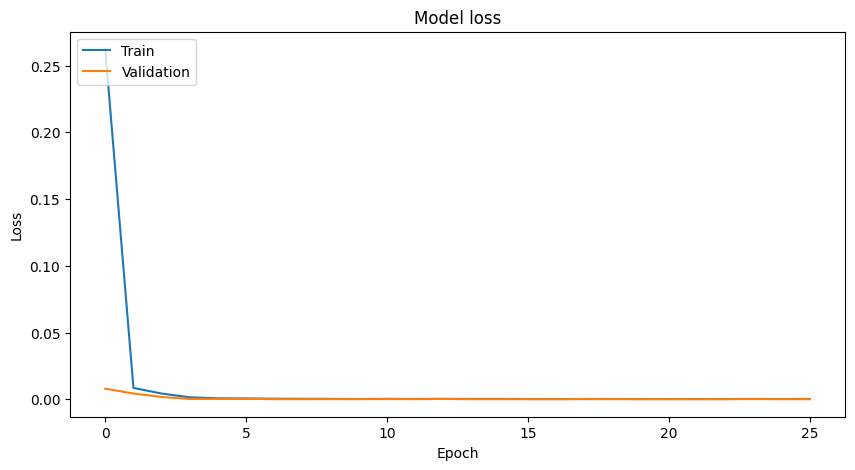

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


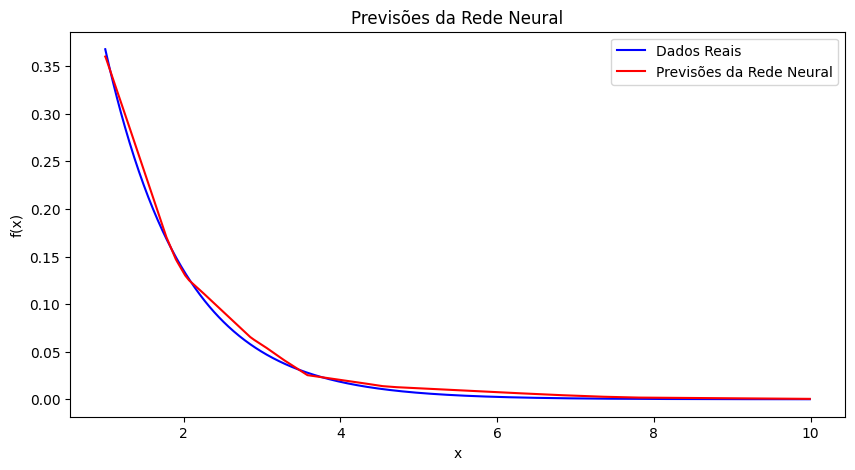

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6323e-05 
Loss: 2.7563937692320906e-05


In [ ]:
y_pred = model.predict(x)
plt.plot(x, y, label='Dados Reais', color='blue')
plt.plot(x, y_pred, label='Previsões da Rede Neural', color='red')
plt.title('Previsões da Rede Neural')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

loss = model.evaluate(x, y)
print(f'Loss: {loss}')

# 1- b) $$ f(x) =\log_{10}(x)$$


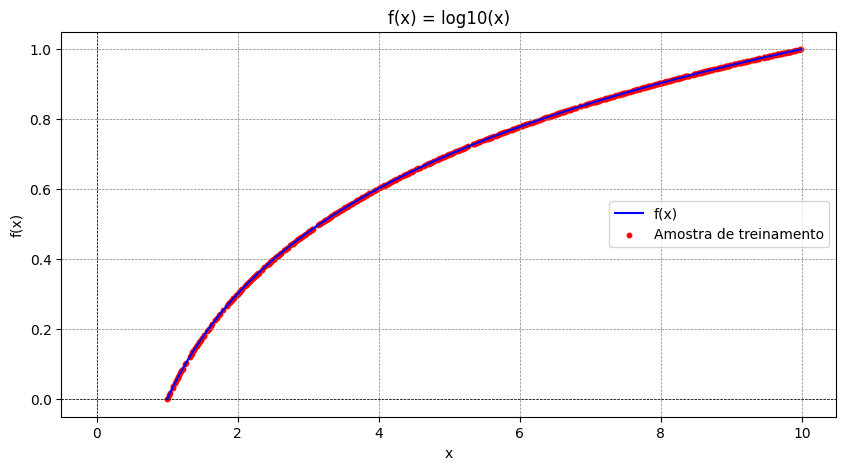

In [ ]:
inicio = 1
fim = 10
step = 0.01
x = np.arange(inicio,fim,step)
y = f1(x)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


plt.plot(x, y, label='f(x)', color='blue')
plt.scatter(x_train, y_train, label='Amostra de treinamento', color='red', s =10)

plt.title('f(x) = log10(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [ ]:
callback = callbacks.EarlyStopping(monitor='loss', patience=5, start_from_epoch= 20)

model = keras.Sequential()
model.add(layers.Dense(64, input_dim=1, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse')

print(model.summary())

history = model.fit(x_train, y_train, batch_size= 32, epochs=200, validation_data=(x_val, y_val), callbacks=[callback], verbose= 0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,513 (33.25 KB)

 Trainable params: 8,513 (33.25 KB)

 Non-trainable params: 0 (0.00 B)

None
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2431e-05 
Loss no conjunto de teste: 2.3230577426147647e-05


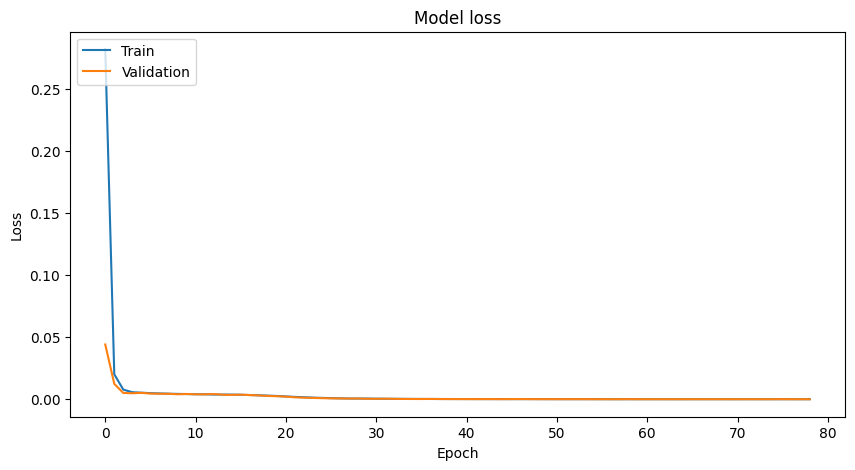

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


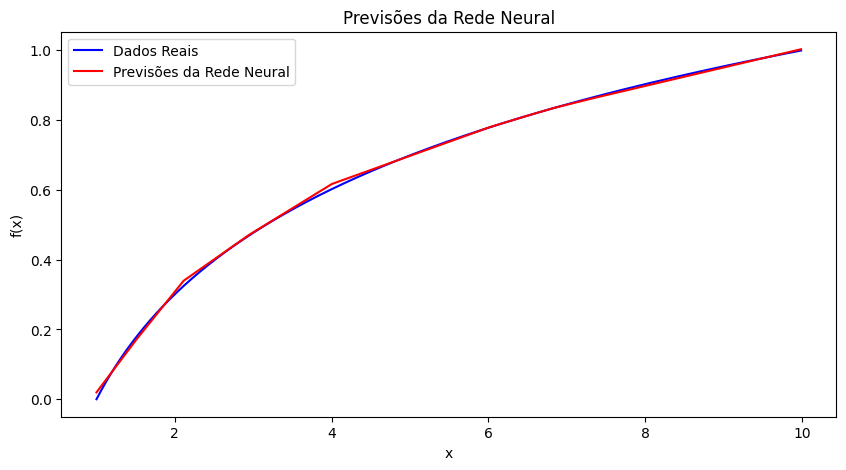

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9146e-05 
Loss: 2.470830258971546e-05


In [ ]:
y_pred = model.predict(x)
plt.plot(x, y, label='Dados Reais', color='blue')
plt.plot(x, y_pred, label='Previsões da Rede Neural', color='red')
plt.title('Previsões da Rede Neural')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

loss = model.evaluate(x, y)
print(f'Loss: {loss}')

# 1- c) $$f(x) = 10 x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2 $$


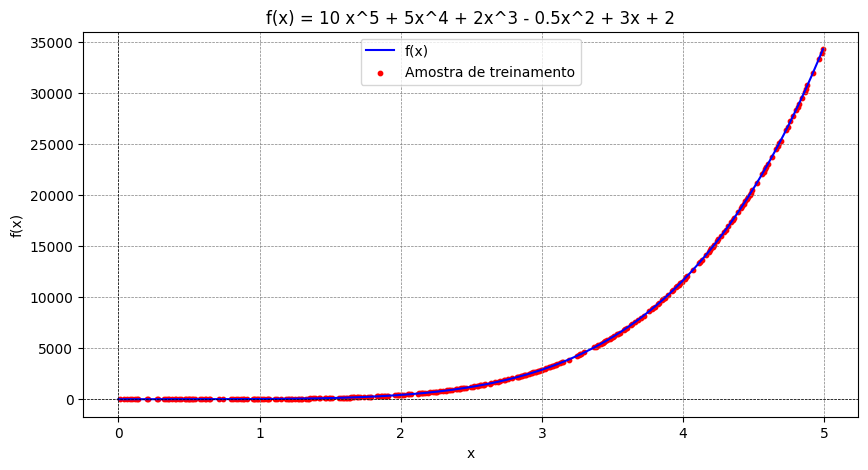

In [ ]:
inicio = 0
fim = 5
step = 0.01
x = np.arange(inicio,fim,step)
y = f2(x)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


plt.plot(x, y, label='f(x)', color='blue')
plt.scatter(x_train, y_train, label='Amostra de treinamento', color='red', s =10)

plt.title('f(x) = 10 x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

$$ error = \hat{y} - y $$

$$
\text{logcosh} = \text{mean}\left(\log\left(\frac{e^{\text{error}} + e^{-\text{error}}}{2}\right)\right)
$$


In [ ]:
callback = callbacks.EarlyStopping(monitor='loss', patience=5, start_from_epoch= 20)

model = keras.Sequential()
model.add(layers.Dense(64, input_dim=1, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='log_cosh')

print(model.summary())

history = model.fit(x_train, y_train, batch_size= 32, epochs=100, validation_data=(x_val, y_val), callbacks=[callback], verbose =0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

None
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 207.5909 
Loss no conjunto de teste: 183.10824584960938


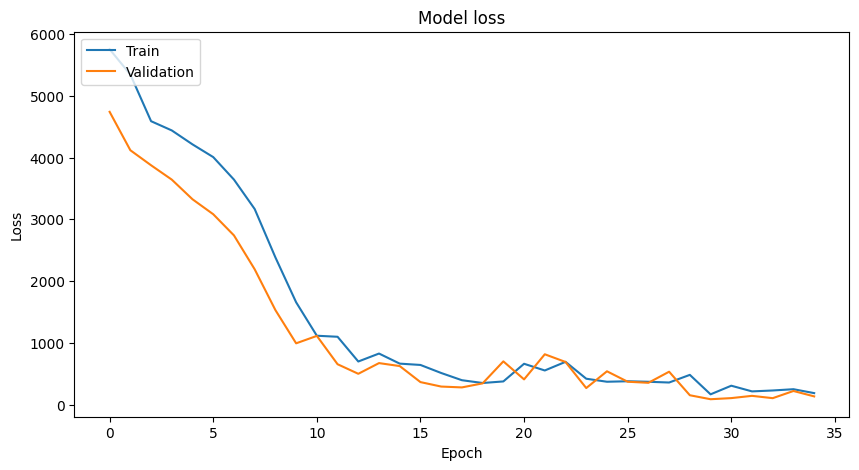

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


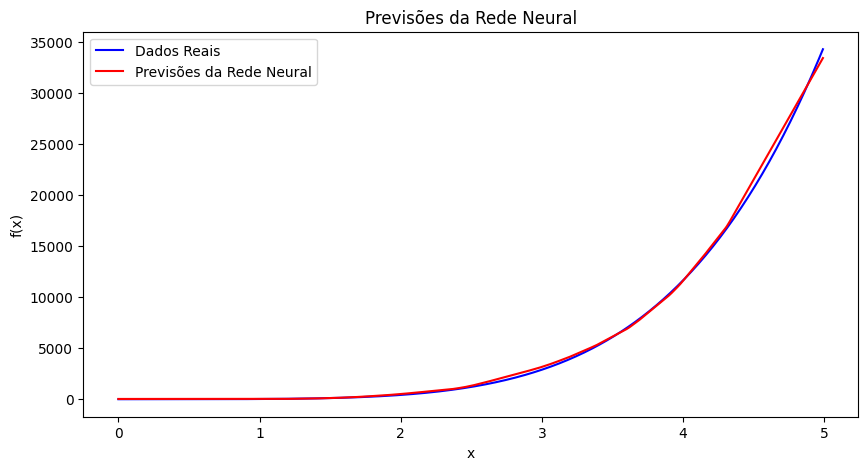

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71.0602 
Loss: 164.55165100097656


In [ ]:
y_pred = model.predict(x)
plt.plot(x, y, label='Dados Reais', color='blue')
plt.plot(x, y_pred, label='Previsões da Rede Neural', color='red')
plt.title('Previsões da Rede Neural')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

loss = model.evaluate(x, y)
print(f'Loss: {loss}')

# 2.

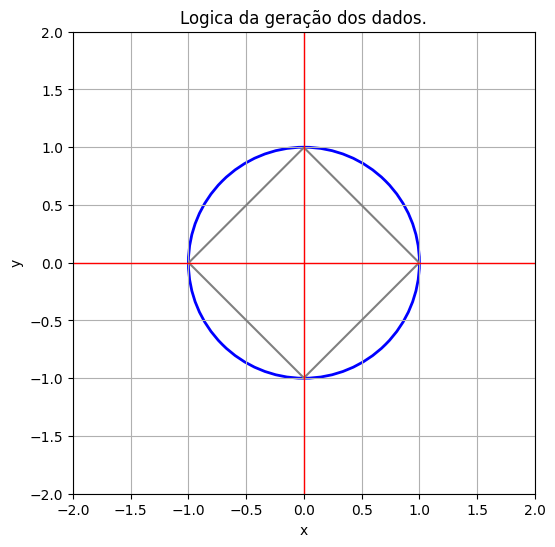

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal', 'box')

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

reta_ab = Y <= -X + 1
reta_bc = Y >= X - 1
reta_cd = Y >= -X - 1
reta_da = Y <= X + 1

ax.contour(X, Y, reta_ab & reta_bc & reta_cd & reta_da, levels=[0.5], colors='gray')

ax.axhline(0, color='red', linestyle='-', linewidth=1)  # y = 0
ax.axvline(0, color='red', linestyle='-', linewidth=1)  # x = 0

circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=2)
ax.add_patch(circle)

ax.grid(True)
plt.title('Logica da geração dos dados.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
def generate_points_in_circle(num_points, radius=1):
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = radius * np.sqrt(np.random.uniform(0, 1, num_points))
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.stack((x, y), axis=1)

In [29]:
def ponto_no_losango(point):
    x, y = point
    dentro_ab = y <= -x + 1
    dentro_bc = y >= x - 1
    dentro_cd = y >= -x - 1
    dentro_da = y <= x + 1
    if dentro_ab and dentro_bc and dentro_cd and dentro_da:
        return True
    else:
        return False

In [30]:
num_points_per_class = 200

points_in_circle = generate_points_in_circle(num_points_per_class * 8)

C1, C2, C3, C4 = [], [], [], []
C5, C6, C7, C8 = [], [], [], []

for point in points_in_circle:
    x, y = point
    if ponto_no_losango(point):
        if x >= 0 and y >= 0:
            C1.append(point)
        elif x < 0 and y >= 0:
            C2.append(point)
        elif x < 0 and y < 0:
            C3.append(point)
        elif x >= 0 and y < 0:
            C4.append(point)
    else:
        if x >= 0 and y >= 0:
            C5.append(point)
        elif x < 0 and y >= 0:
            C6.append(point)
        elif x < 0 and y < 0:
            C7.append(point)
        elif x >= 0 and y < 0:
            C8.append(point)

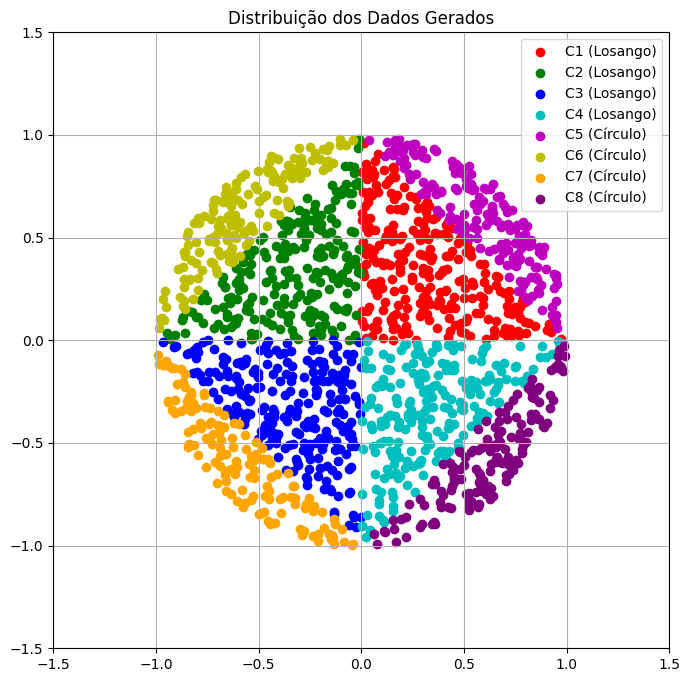

In [31]:
C1 = np.array(C1)
C2 = np.array(C2)
C3 = np.array(C3)
C4 = np.array(C4)
C5 = np.array(C5)
C6 = np.array(C6)
C7 = np.array(C7)
C8 = np.array(C8)

plt.figure(figsize=(8, 8))
plt.scatter(C1[:, 0], C1[:, 1], label='C1 (Losango)', color='r')
plt.scatter(C2[:, 0], C2[:, 1], label='C2 (Losango)', color='g')
plt.scatter(C3[:, 0], C3[:, 1], label='C3 (Losango)', color='b')
plt.scatter(C4[:, 0], C4[:, 1], label='C4 (Losango)', color='c')
plt.scatter(C5[:, 0], C5[:, 1], label='C5 (Círculo)', color='m')
plt.scatter(C6[:, 0], C6[:, 1], label='C6 (Círculo)', color='y')
plt.scatter(C7[:, 0], C7[:, 1], label='C7 (Círculo)', color='orange')
plt.scatter(C8[:, 0], C8[:, 1], label='C8 (Círculo)', color='purple')
plt.legend()
plt.title('Distribuição dos Dados Gerados')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [32]:
arrays = [C1, C2, C3, C4, C5, C6, C7, C8]

df = pd.concat([pd.DataFrame({'x': arr[:, 0], 'y': arr[:, 1], 'Class': i}) for i, arr in enumerate(arrays)], ignore_index=True)

x = df[['x', 'y']].values
y = df['Class'].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
df['Class'].value_counts()

,count
Class,
0,267
2,243
1,233
3,224
4,181
5,165
7,147
6,140


# Adam

In [52]:
callback = callbacks.EarlyStopping(monitor='loss', patience=2, start_from_epoch = 30)

model = keras.Sequential()
model.add(layers.Dense(16, input_dim=2, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

optimizer = keras.optimizers.SGD(learning_rate=0.1)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val), verbose= 0, callbacks=[callback])

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

None
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9398 - loss: 0.2822  
Loss: 0.2686961889266968, Accuracy: 0.949999988079071


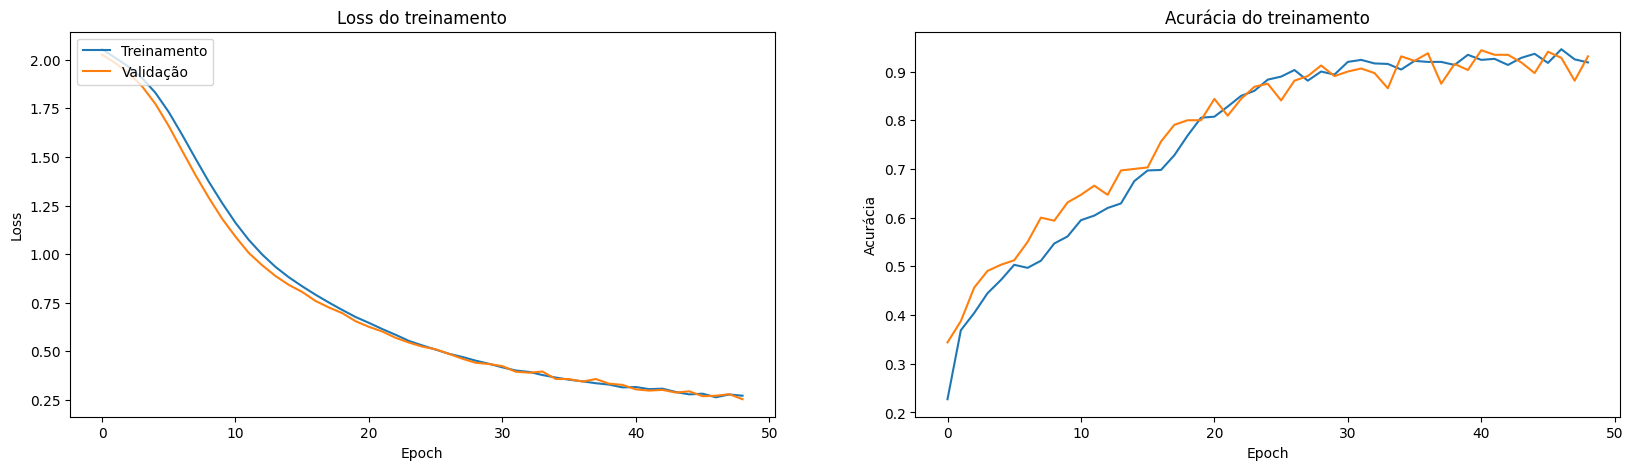

In [53]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss do treinamento')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do treinamento')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')

plt.show()

In [54]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        51
           1       1.00      0.96      0.98        53
           2       1.00      0.93      0.96        56
           3       0.95      0.97      0.96        36
           4       0.81      1.00      0.90        35
           5       1.00      1.00      1.00        34
           6       0.89      1.00      0.94        25
           7       0.97      0.97      0.97        30

    accuracy                           0.95       320
   macro avg       0.95      0.96      0.95       320
weighted avg       0.95      0.95      0.95       320

Confusion Matrix:
[[43  0  0  0  8  0  0  0]
 [ 2 51  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  3  0]
 [ 0  0  0 35  0  0  0  1]
 [ 0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  1  0  0  0 29]]


A atualização dos pesos $w$ com `momentum` é dada por:

\
$$v_t = \gamma v_{t-1} + \eta \nabla L(w_t)$$



$$ w_{t+1} = w_t - v_t $$


Onde:

- $v_t$: Atualização do momento na iteração $t$.
- $\gamma$: `momentum` (entre 0 e 1).
- $\eta$: Taxa de aprendizado (`learning_rate`).
- $\nabla L(w_t)$: Gradiente do erro em relação aos pesos na iteração $t$.
- $w_{t+1}$: Pesos atualizados para a próxima iteração.


# SGD (Mometum)

In [62]:
callback = callbacks.EarlyStopping(monitor='loss', patience=2, start_from_epoch = 30)

model = keras.Sequential()
model.add(layers.Dense(16, input_dim=2, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

print(model.summary())

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_val, y_val), verbose= 0, callbacks=[callback])

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 8)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

None
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8687 - loss: 0.3242  
Loss: 0.2987007200717926, Accuracy: 0.8843749761581421


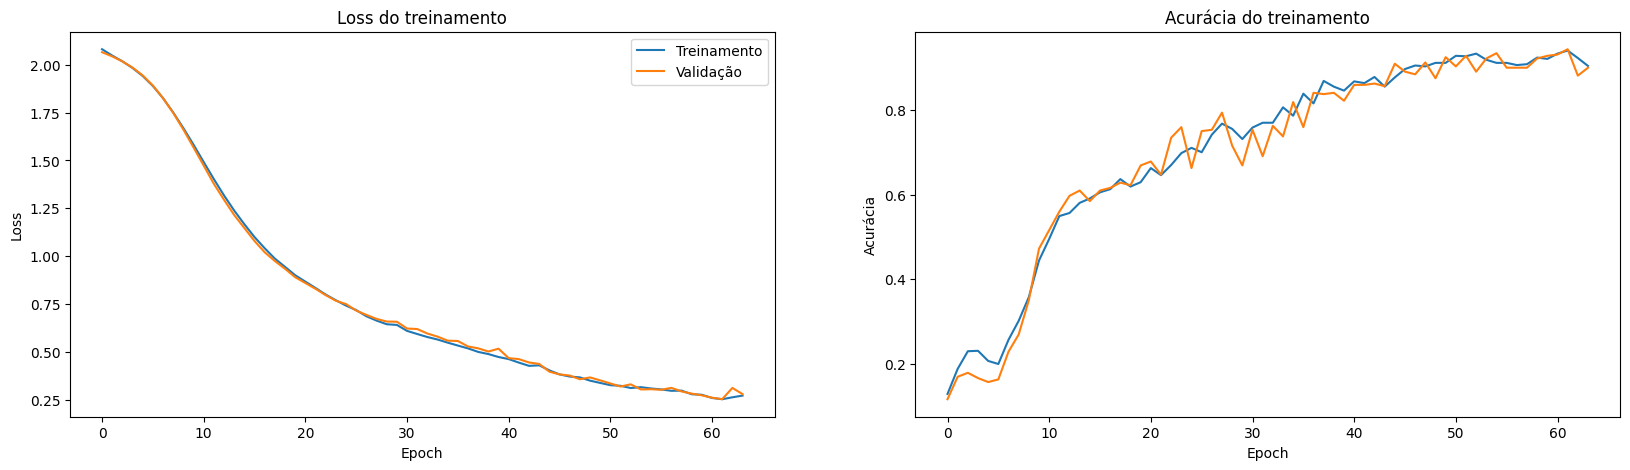

In [63]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss do treinamento')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do treinamento')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')

plt.show()

In [ ]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        40
           1       0.98      0.87      0.92        60
           2       0.92      0.98      0.95        58
           3       0.56      0.91      0.69        45
           4       0.77      1.00      0.87        23
           5       0.81      1.00      0.90        30
           6       0.97      0.97      0.97        33
           7       0.00      0.00      0.00        31

    accuracy                           0.83       320
   macro avg       0.75      0.81      0.77       320
weighted avg       0.78      0.83      0.80       320

Confusion Matrix:
[[31  1  0  1  7  0  0  0]
 [ 1 52  0  0  0  7  0  0]
 [ 0  0 57  0  0  0  1  0]
 [ 0  0  4 41  0  0  0  0]
 [ 0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0 30  0  0]
 [ 0  0  1  0  0  0 32  0]
 [ 0  0  0 31  0  0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3.

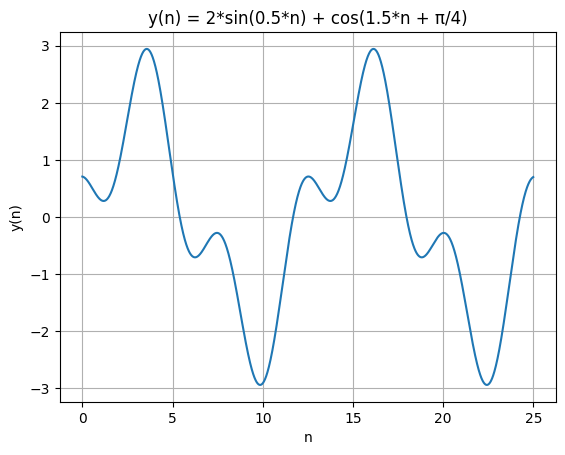

In [20]:
h = 0.01
a = 0
b = 25
n = np.arange(0, b-a, h)

y_n = 2 * np.sin(0.5 * n) + np.cos(1.5 * n + np.pi / 4)

plt.plot(n, y_n)
plt.title("y(n) = 2*sin(0.5*n) + cos(1.5*n + π/4)")
plt.xlabel("n")
plt.ylabel("y(n)")
plt.grid(True)
plt.show()


In [21]:
# Parâmetro k
k = 13  # Tamanho da janela

df = pd.DataFrame([y_n[i:i+k+1] for i in range(len(y_n) - k)], columns=[f't({i})' for i in range(k+1)])
df.head()

,t(0),t(1),t(2),t(3),t(4),t(5),t(6),t(7),t(8),t(9),t(10),t(11),t(12),t(13)
0,0.707107,0.706421,0.705578,0.704581,0.703431,0.702130,0.700682,0.699088,0.697351,0.695473,0.693456,0.691304,0.689018,0.686600
1,0.706421,0.705578,0.704581,0.703431,0.702130,0.700682,0.699088,0.697351,0.695473,0.693456,0.691304,0.689018,0.686600,0.684055
2,0.705578,0.704581,0.703431,0.702130,0.700682,0.699088,0.697351,0.695473,0.693456,0.691304,0.689018,0.686600,0.684055,0.681383
3,0.704581,0.703431,0.702130,0.700682,0.699088,0.697351,0.695473,0.693456,0.691304,0.689018,0.686600,0.684055,0.681383,0.678588
4,0.703431,0.702130,0.700682,0.699088,0.697351,0.695473,0.693456,0.691304,0.689018,0.686600,0.684055,0.681383,0.678588,0.675672


In [22]:
x = df[[f't({i})' for i in range(k-3)]].values
y = df[[f't({i})' for i in range(k-2, k+1)]].values


x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
input_size = x.shape[1]
out_size = y.shape[1]

In [24]:
model = keras.Sequential()
model.add(layers.Dense(16, input_dim=input_size, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(out_size))
optimizer = keras.optimizers.Adam(learning_rate=0.01)

print(model.summary())

model.compile(optimizer=optimizer, loss='mse')

history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose = 0)
loss = model.evaluate(x_test, y_test)
print(f'Loss: {loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

None
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4.4146e-04
Loss: 0.0004322170570958406


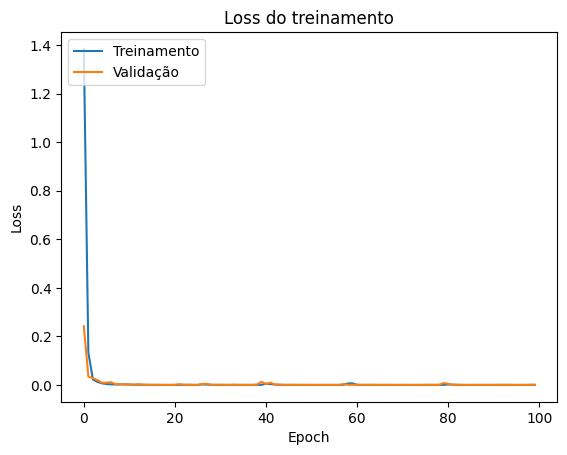

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss do treinamento')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper left')

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


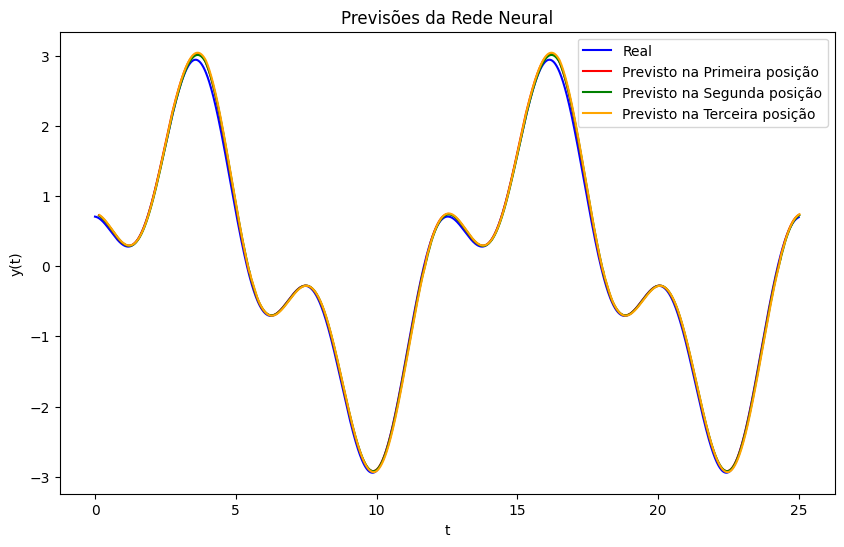

In [26]:
y_pred = model.predict(x)

y_pred_pos_0 = y_pred[:, 0]
y_pred_pos_1 = y_pred[:, 1]
y_pred_pos_2 = y_pred[:, 2]

n_0 = np.arange((k*h)+h, (b-a)+h, h)
n_1 = np.arange((k*h)+h*2, (b-a)+h*2, h)
n_2 = np.arange((k*h)+h*3, (b-a)+h*3, h)

#aumenta o tamanho da figura
plt.figure(figsize=(10, 6))

plt.plot(n, y_n[:], label='Real', color='blue')
plt.plot(n_0, y_pred_pos_0, label='Previsto na Primeira posição', color='red')
plt.plot(n_1, y_pred_pos_1, label='Previsto na Segunda posição', color='green')
plt.plot(n_2, y_pred_pos_2, label='Previsto na Terceira posição', color='orange')


plt.title('Previsões da Rede Neural')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# 4)

Implementar uma rede neural para classificar dados do Titanic. O objetivo é descobrir quais pessoas sobrevivem com base nos dados do dataset.

In [ ]:
# Baixar do kaggle (necessario chave do kaggle)

!pip install kaggle --upgrade

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 39.8MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Descrição do dataset

* survival - 0 = Não, 1 = Sim

* pclass - Classe do ingresso - 1 = 1st, 2 = 2nd, 3 = 3rd

* sex	- Sexo

* Age	- Idade em anos

* sibsp - # de irmãos/cônjuges a bordo do Titanic

* parch - # de pais/filhos a bordo do Titanic

* ticket - Número do bilhete

* fare - Tarifa de passageiro

* cabin - Número da cabine

* embarked - Porto de embarque	C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_result_test = pd.read_csv('gender_submission.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.drop("PassengerId", axis=1, inplace=True)
df_test.drop("PassengerId", axis=1, inplace=True)

In [ ]:
df_train.drop("Name", axis=1, inplace=True)
df_test.drop("Name", axis=1, inplace=True)

In [ ]:
df_train.drop("Ticket", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(891, 9)
(418, 8)


In [ ]:
print(df_train.isna().sum())
print()
print(df_test.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [ ]:
df_train.drop("Cabin", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)

In [ ]:
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)

In [ ]:
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)


In [ ]:
#fare = tarifa
df_test["Fare"].fillna(df_test["Fare"].mean(), inplace=True)

In [ ]:
print(df_train.isna().sum())
print()
print(df_test.isna().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
x_train, y_train = df_train.drop("Survived", axis=1), df_train["Survived"]

print(x_train.shape)
print(y_train.shape)

(891, 7)
(891,)


In [ ]:
x_test, y_test = df_test, df_result_test["Survived"]
print(x_test.shape)
print(y_test.shape)

(418, 7)
(418,)


In [ ]:
mapping_sex = {"male": 0, "female": 1}
mapping_embarked = {"S": 0, "C": 1, "Q": 2}

x_train["Sex"] = x_train["Sex"].replace(mapping_sex)
x_train["Embarked"] = x_train["Embarked"].replace(mapping_embarked)

x_test["Sex"] = x_test["Sex"].replace(mapping_sex)
x_test["Embarked"] = x_test["Embarked"].replace(mapping_embarked)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
def print_result(history, x_test, y_test):
    plt.plot(history.history['loss'])
    plt.title('Erro do Modelo Durante o Treinamento')
    plt.xlabel('Época')
    plt.ylabel('Erro (Mean Absolute Error)')
    plt.show()

    y_pred = model.predict(x_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    report = classification_report(y_test.to_numpy(), y_pred_classes)
    print(report)

    print(confusion_matrix(y_test, y_pred_classes))

# Experimento 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1448 
Loss no conjunto de teste: 0.14201577007770538


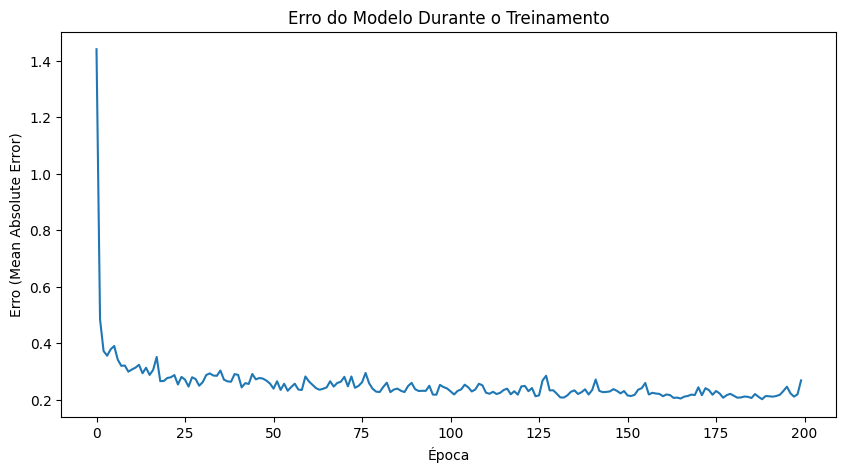

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       266
           1       0.92      0.97      0.95       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

[[253  13]
 [  4 148]]


In [ ]:


model = keras.Sequential()
model.add(layers.Dense(64, input_dim=7, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_absolute_error")

print(model.summary())

history = model.fit(x_train, y_train, batch_size=32, epochs=200, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')

print_result(history, x_test, y_test)

# Experimento 2

* Adicionado dropout


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1183  
Loss no conjunto de teste: 0.10584525763988495


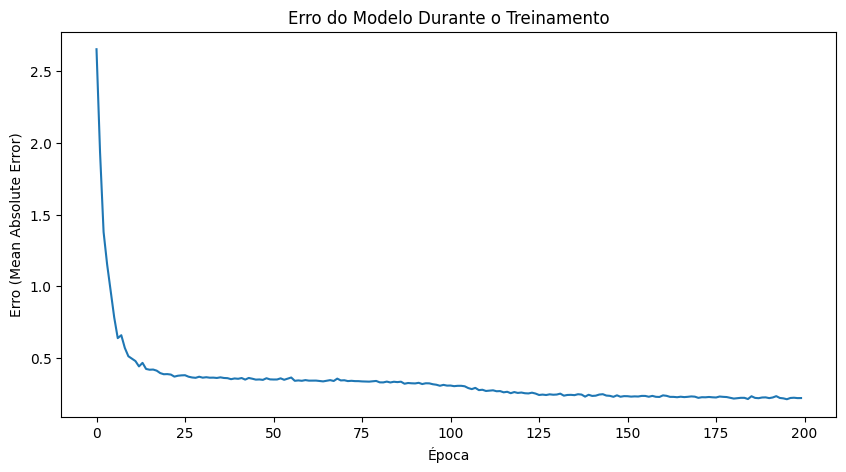

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       266
           1       0.96      0.86      0.91       152

    accuracy                           0.94       418
   macro avg       0.94      0.92      0.93       418
weighted avg       0.94      0.94      0.93       418

[[260   6]
 [ 21 131]]


In [ ]:



model = keras.Sequential()
model.add(layers.Dense(64, input_dim=7, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_absolute_error")

print(model.summary())

history = model.fit(x_train, y_train, batch_size=32, epochs=200, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')



print_result(history, x_test, y_test)

# Experimento 3

* batch size 32 -> 16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1121  
Loss no conjunto de teste: 0.10145165771245956


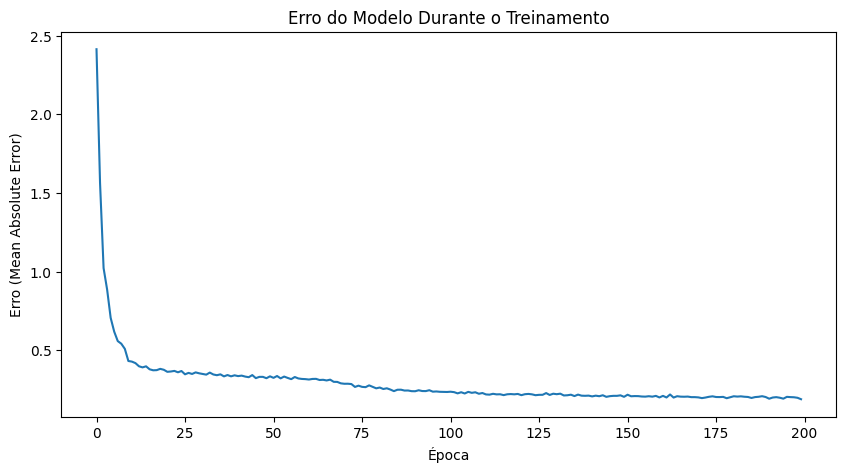

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       266
           1       0.95      0.82      0.88       152

    accuracy                           0.92       418
   macro avg       0.92      0.89      0.91       418
weighted avg       0.92      0.92      0.91       418

[[259   7]
 [ 28 124]]


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, input_dim=7, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_absolute_error")

print(model.summary())

history = model.fit(x_train, y_train, batch_size=16, epochs=200, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')


print_result(history, x_test, y_test)

# Experimento 4

* Removido dropout
* Substituido camadas com 64 neurônios para 2 camadas com 32 neurônios

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1202  
Loss no conjunto de teste: 0.11074014008045197


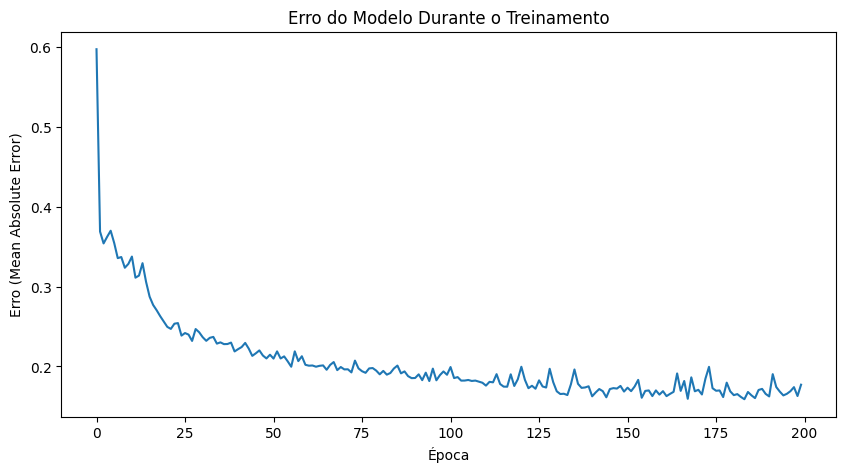

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       266
           1       0.90      0.81      0.85       152

    accuracy                           0.90       418
   macro avg       0.90      0.88      0.89       418
weighted avg       0.90      0.90      0.90       418

[[252  14]
 [ 29 123]]


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(32, input_dim=7, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_absolute_error")

print(model.summary())

history = model.fit(x_train, y_train, batch_size=16, epochs=200, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')

print_result(history, x_test, y_test)

# Experimento 5

* Adicionado dropout a todas as camadas

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0980  
Loss no conjunto de teste: 0.0808701291680336


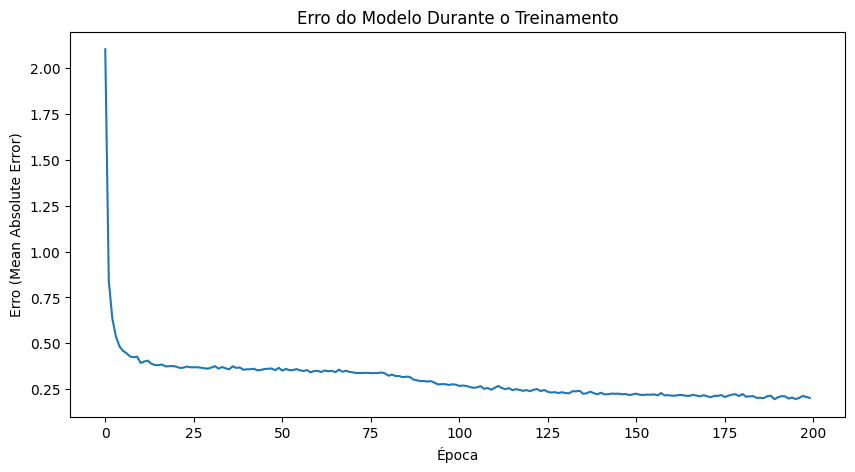

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       266
           1       0.95      0.88      0.91       152

    accuracy                           0.94       418
   macro avg       0.94      0.92      0.93       418
weighted avg       0.94      0.94      0.94       418

[[259   7]
 [ 19 133]]


In [ ]:


model = keras.Sequential()
model.add(layers.Dense(32, input_dim=7, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_absolute_error")

print(model.summary())

history = model.fit(x_train, y_train, batch_size=16, epochs=200, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')


print_result(history, x_test, y_test)

# Experimento 6

* Removido dropout das camadas 1 e 3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

None
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2198  
Loss no conjunto de teste: 0.20861780643463135


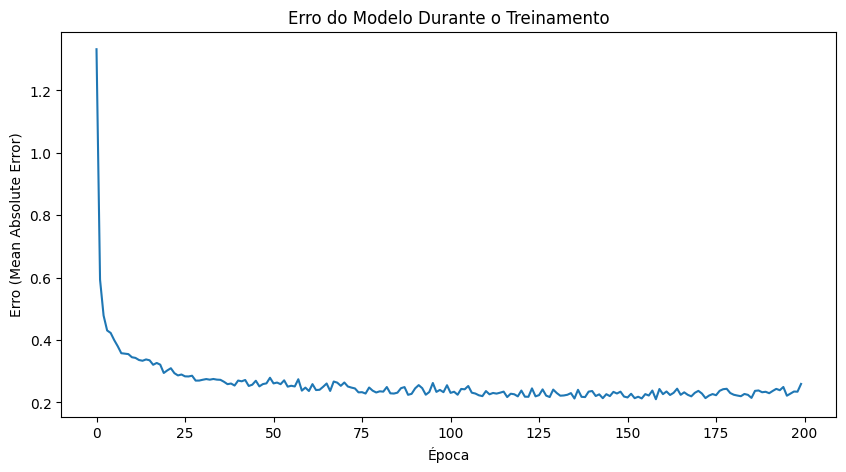

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       266
           1       0.68      0.93      0.79       152

    accuracy                           0.82       418
   macro avg       0.81      0.84      0.81       418
weighted avg       0.85      0.82      0.82       418

[[200  66]
 [ 11 141]]


In [ ]:


model = keras.Sequential()
model.add(layers.Dense(32, input_dim=7, activation='relu'))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mean_absolute_error")

print(model.summary())

history = model.fit(x_train, y_train, batch_size=16, epochs=200, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Loss no conjunto de teste: {loss}')


print_result(history, x_test, y_test)